In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [8]:
series = pd.read_csv('shampoo_sales.csv',header=0, index_col=0)

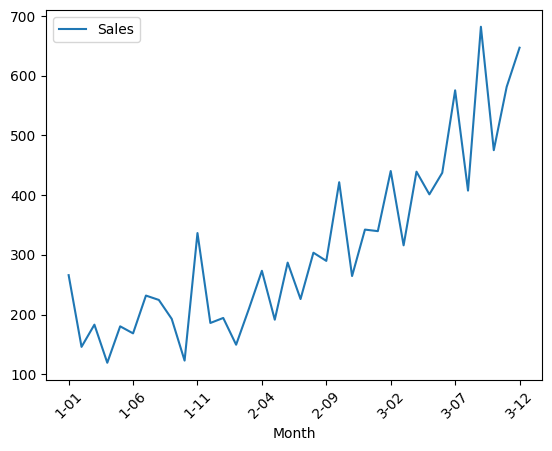

In [9]:
series.plot(legend=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [10]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [11]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


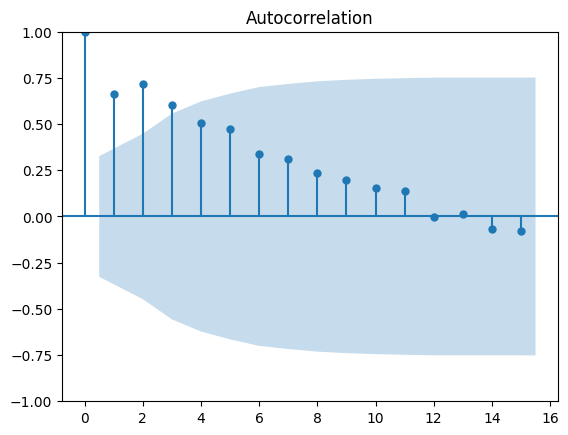

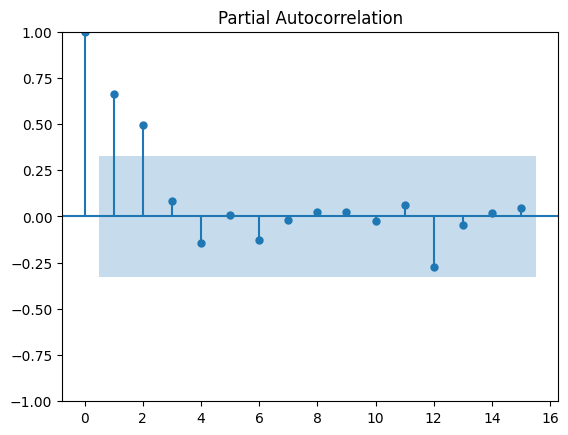

In [12]:
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

# We can check AR(1), AR(2), AR(7)

In [23]:
ar_orders = [1, 2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #creating AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [24]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 2479.0806278346026
AIC for AR(2): 2476.363657107163
AIC for AR(7): 2472.778262629023


In [25]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.78031989535
BIC for AR(2): 2491.9632465214927
BIC for AR(7): 2507.8773388112654


# If we treat this as a ARMA process

In [22]:
from itertools import product

p_values = range(1, 3)
q_values = range(0, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: V

In [23]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,0) - AIC: 406.02228976500896, BIC: 410.7728465803773
ARMA(1,1) - AIC: 402.4666524198318, BIC: 408.80072817365624
ARMA(1,2) - AIC: 401.52532914117825, BIC: 409.4429238334588
ARMA(2,0) - AIC: 403.627564133428, BIC: 409.96163988725243
ARMA(2,1) - AIC: 404.2862142410243, BIC: 412.20380893330486
ARMA(2,2) - AIC: 404.6272667477528, BIC: 414.12838037848945


In [25]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [45]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [46]:
perform_adf_test(series)


ADF Statistic: -7.162321
p-value: 0.000000


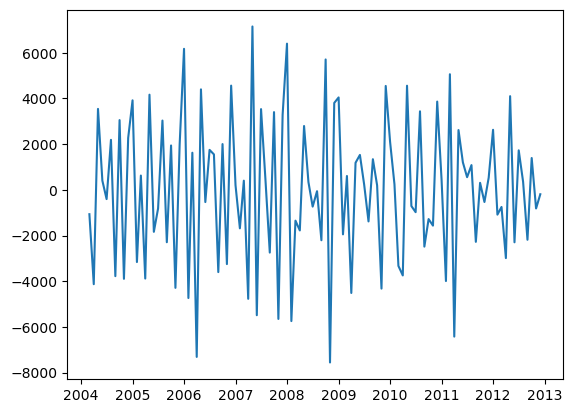

In [47]:
plt.plot(series)


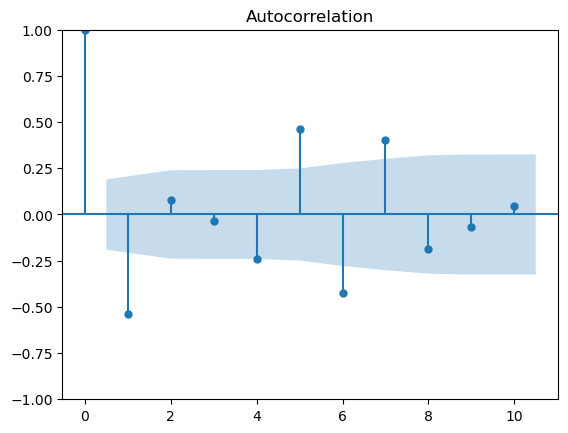

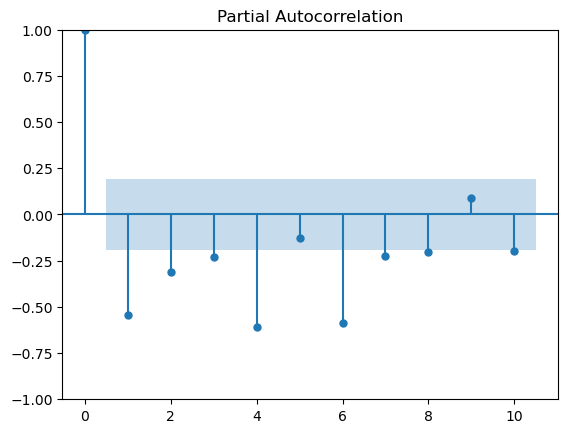

In [50]:
plot_acf(series, lags=10)
plot_pacf(series, lags=10)

plt.show()


In [52]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


In [53]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660582
AIC for AR(6): 1899.6497441386373
AIC for AR(10): 1902.376545014111


In [54]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))


BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198307305
BIC for AR(6): 1920.957256891534
BIC for AR(10): 1934.3378141434557


In [30]:
arma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -196.314
Date:                Fri, 09 Aug 2024   AIC                            404.627
Time:                        05:10:01   BIC                            414.128
Sample:                             0   HQIC                           407.943
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9176      5.737      2.077      0.038       0.673      23.162
ar.L1         -1.5403      0.282     -5.453      0.000      -2.094      -0.987
ar.L2         -0.6198      0.250     -2.483      0.013      -1.109      -0.130
ma.L1          0.5291      4.316      0.123      0.902      -7.929       8.987
ma.L2         -0.4675      1.999     -0.234      0.815      -4.385       3.450
sigma2      4036.2597   1.67e+04      0.241      0.809   -2.87e+04    3.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.84   Prob(JB):                         0.96
Heteroskedasticity (H):               0.89   Skew:                             0.10
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""